In [67]:
### Final Capstone project
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter,YearLocator
import matplotlib.dates as mdates

import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.tsa.seasonal import _extrapolate_trend
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose,STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

In [69]:
gold = pd.read_csv('data\HistoricalData_1719985119040.csv')

In [71]:
gold.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/02/2024,2333.4,146568.0,2341.6,2346.1,2327.4
1,07/01/2024,2338.9,136861.0,2336.2,2348.8,2328.2
2,06/28/2024,2339.6,131191.0,2338.6,2350.6,2329.7
3,06/27/2024,2336.6,135784.0,2309.4,2342.0,2306.8
4,06/26/2024,2313.2,182929.0,2331.8,2335.8,2304.7


In [73]:
gold_eda = gold.copy()

In [222]:
gold_eda = gold.copy()
gold_eda = gold_eda.set_index(pd.to_datetime(gold_eda['Date'])).drop('Date', axis = 1)

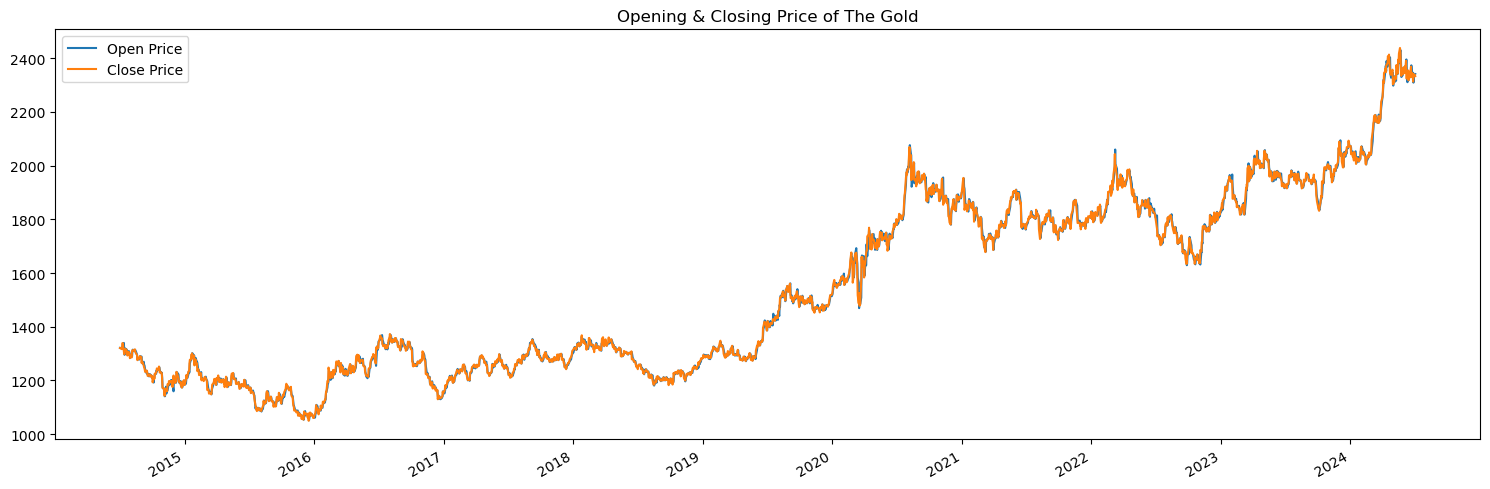

In [77]:
plt.figure(figsize=(15, 5))
gold_eda['Open'].plot()
gold_eda['Close/Last'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price of The Gold")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

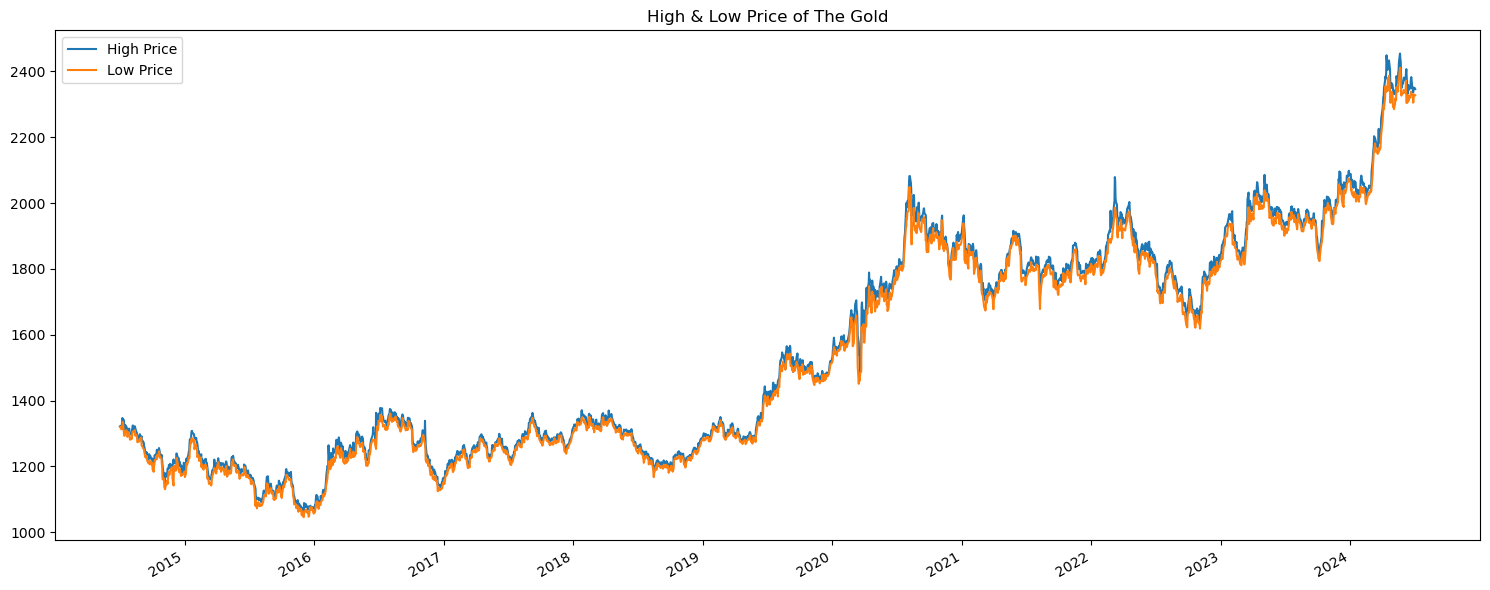

In [79]:
plt.figure(figsize=(15, 6))
gold_eda['High'].plot()
gold_eda['Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("High & Low Price of The Gold")
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

<Axes: xlabel='High', ylabel='Count'>

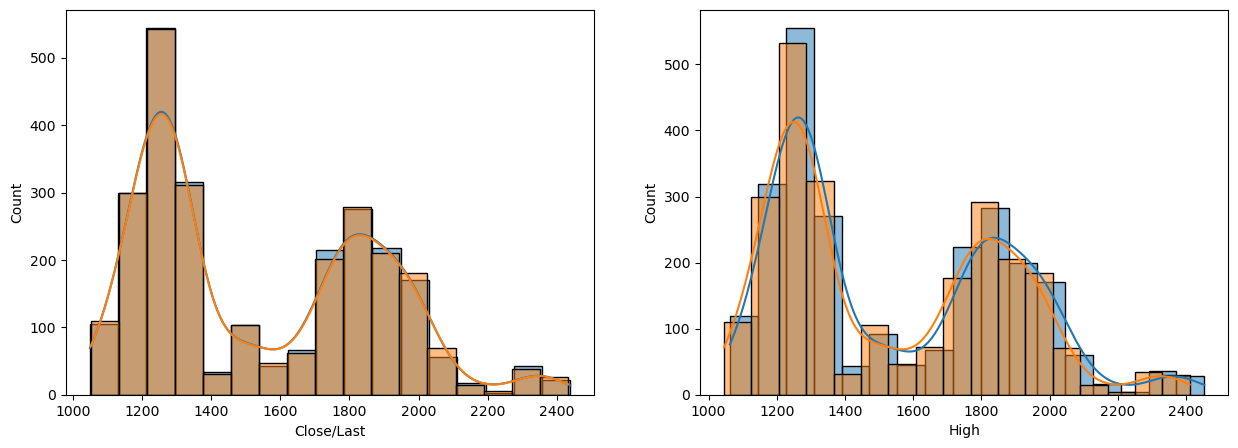

In [81]:

figure,axes = plt.subplots(1,2,figsize=(15,5))

sns.histplot(gold_eda['Close/Last'],kde=True,ax=axes[0])
sns.histplot(gold_eda['Open'],kde=True,ax=axes[0])
sns.histplot(gold_eda['High'],kde=True,ax=axes[1])
sns.histplot(gold_eda['Low'],kde=True,ax=axes[1])

In [83]:
# Now get Global Economic Policy Uncertainty Index:
G_Uncertainity = pd.read_csv('data\GEPUCURRENT.csv').set_index('DATE')

In [85]:
G_Uncertainity

,GEPUCURRENT
DATE,
1997-01-01,74.758759
1997-02-01,77.863026
1997-03-01,67.038275
1997-04-01,72.927591
1997-05-01,71.815533
...,...
2024-01-01,221.219238
2024-02-01,235.483829
2024-03-01,191.002431


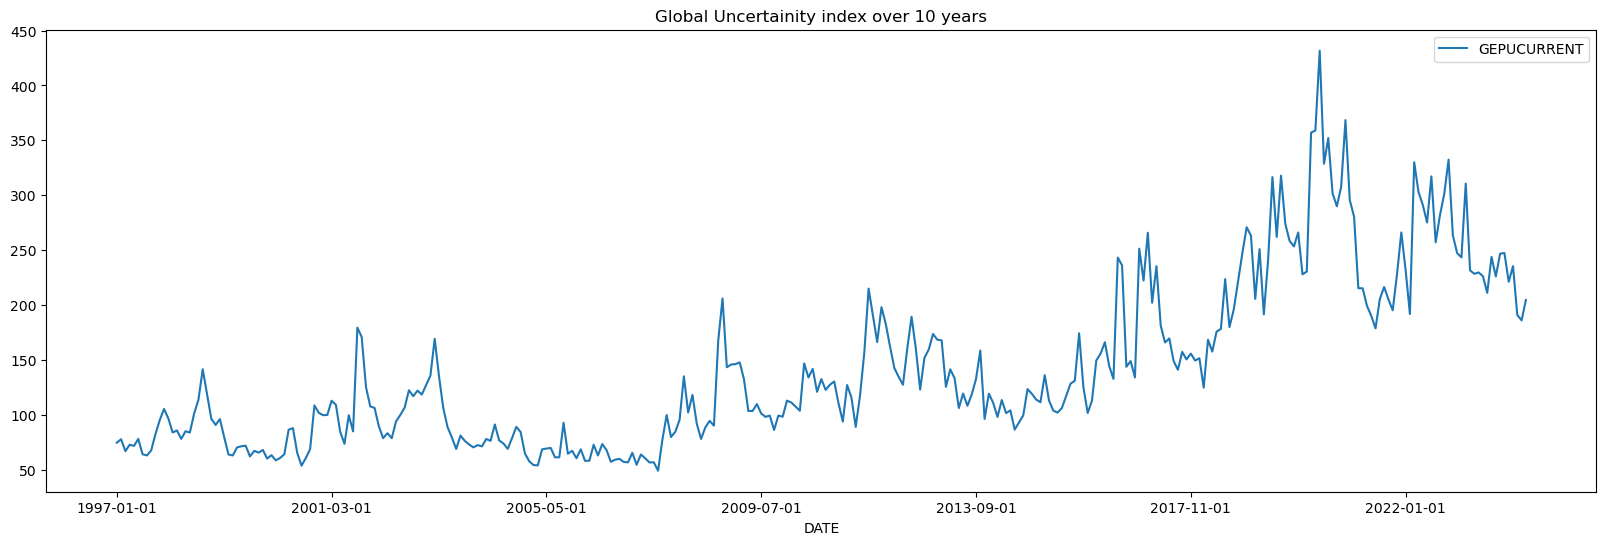

In [88]:
fig, ax = plt.subplots(figsize=(20, 6))
G_Uncertainity.plot(ax=ax, x_compat=True)  # Use x_compat=True for compatibility with date locators
plt.title('Global Uncertainity index over 10 years')

plt.show()

# Since the data for Global uncertainity is not matching with gold_eda, I drop it from mergeing

In [90]:
US_Uncertainity = pd.read_csv(r'data\USEPUINDXD.csv').set_index('DATE')
US_Uncertainity.head()

,USEPUINDXD
DATE,
2014-07-01,94.53
2014-07-02,85.01
2014-07-03,41.51
2014-07-04,52.44
2014-07-05,79.35


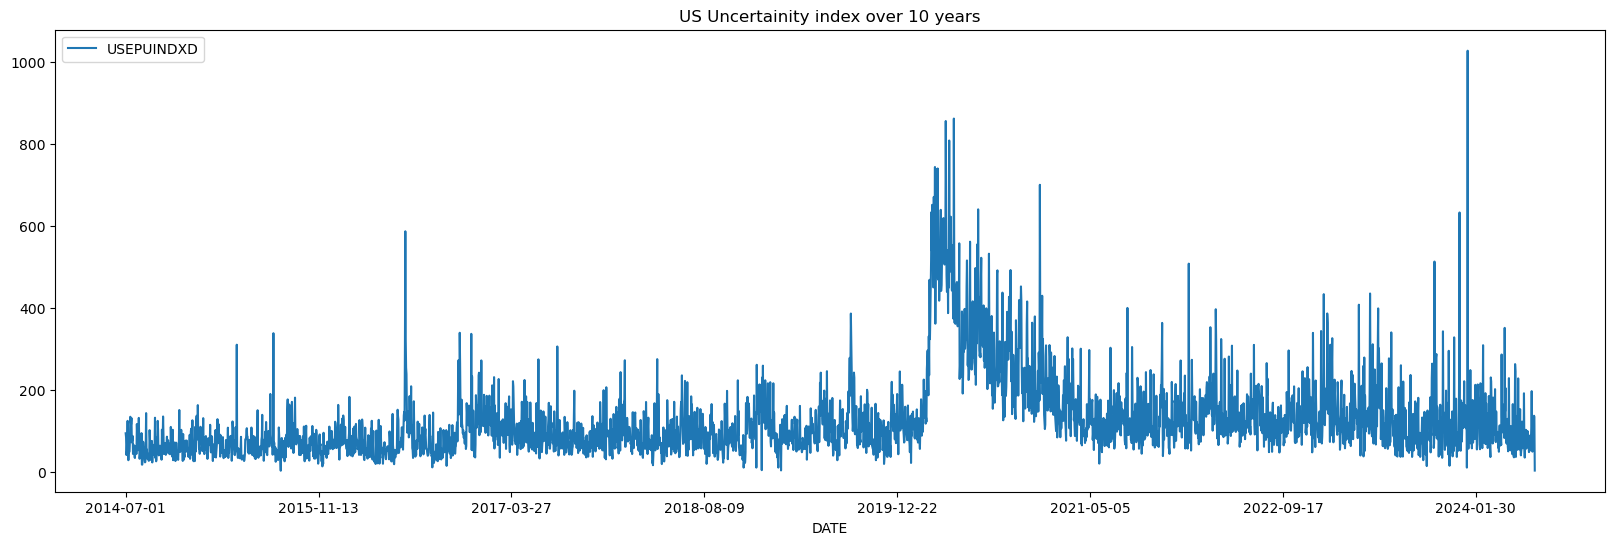

In [92]:
### Now get US Economic policy uncertainity

fig, ax = plt.subplots(figsize=(20, 6))
US_Uncertainity.plot(ax=ax, x_compat=True)  # Use x_compat=True for compatibility with date locators
plt.title('US Uncertainity index over 10 years')

plt.show()

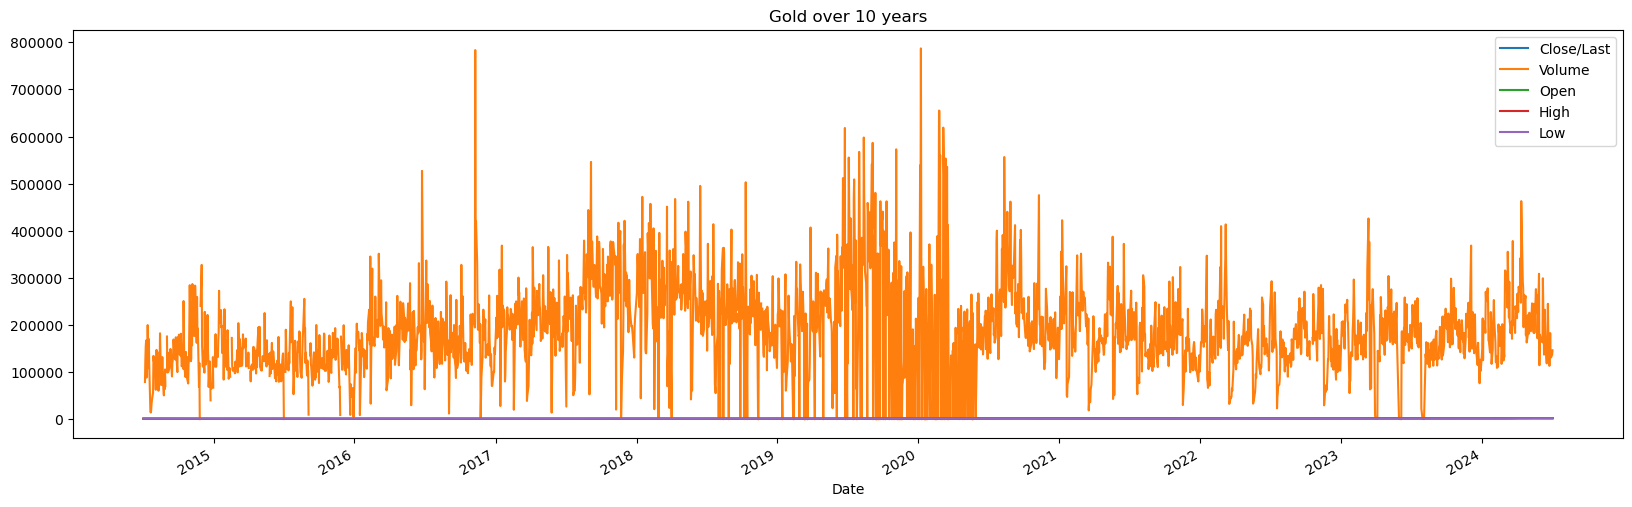

In [94]:
fig, ax = plt.subplots(figsize=(20, 6))
gold_eda.plot(ax=ax, x_compat=True)  # Use x_compat=True for compatibility with date locators
plt.title('Gold over 10 years')

plt.show()

In [96]:
#Add US uncertainity to gold_eda
US_Uncertainity['USEPUINDXD']


DATE
2014-07-01     94.53
2014-07-02     85.01
2014-07-03     41.51
2014-07-04     52.44
2014-07-05     79.35
               ...  
2024-06-27     90.29
2024-06-28     53.23
2024-06-29    137.27
2024-06-30    134.77
2024-07-01      3.67
Name: USEPUINDXD, Length: 3654, dtype: float64

In [111]:
gold_eda

,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-07-02,2333.4,146568.0,2341.6,2346.1,2327.4
2024-07-01,2338.9,136861.0,2336.2,2348.8,2328.2
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7
...,...,...,...,...,...
2014-07-09,1324.3,155101.0,1320.4,1333.4,1318.7
2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3
2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1


In [113]:
# Perform Timeseries analysis on Gold EDA but remove unneeded columns

gold_df = gold_eda.drop(columns=['Volume','Open','High','Low'])
gold_df.tail()


,Close/Last
Date,
2014-07-09,1324.3
2014-07-08,1316.5
2014-07-07,1317.0
2014-07-04,1320.6
2014-07-03,1320.6


In [115]:
gold_df.sort_values(by='Date', ascending=True, inplace=True)
gold_df.head()

,Close/Last
Date,
2014-07-03,1320.6
2014-07-04,1320.6
2014-07-07,1317.0
2014-07-08,1316.5
2014-07-09,1324.3


In [117]:
y_hist, y_future = train_test_split(gold_df, shuffle=False)

In [119]:
y_hist.head()

,Close/Last
Date,
2014-07-03,1320.6
2014-07-04,1320.6
2014-07-07,1317.0
2014-07-08,1316.5
2014-07-09,1324.3


In [121]:
y_hist.tail()

,Close/Last
Date,
2021-12-16,1798.2
2021-12-17,1804.9
2021-12-20,1794.6
2021-12-21,1788.7
2021-12-22,1802.2


In [123]:
def define_d(data):
    X_train = adfuller(data, autolag='AIC')
    adf = X_train[0]
    pvalue = X_train[1]
    critical_value = X_train[4]['5%']
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations', 'Critical Value']
    for value,label in zip(X_train,labels):
        print(label+' : '+str(value) )

    if (pvalue < 0.05):
        print("** Data Is Stationary **")
    else:
        print("** Indicating It Is Non-Stationary **")

define_d(y_hist)

ADF Test Statistic : -0.45240540804783286
p-value : 0.9009744385685003
#Lags Used : 6
Number of Observations : 1890
Critical Value : {'1%': -3.433814658052138, '5%': -2.8630704504871605, '10%': -2.56758475462613}
** Indicating It Is Non-Stationary **


In [125]:
data_diff = y_hist.diff()
data_diff.dropna(inplace=True)
define_d(data_diff)

ADF Test Statistic : -19.828345284493096
p-value : 0.0
#Lags Used : 5
Number of Observations : 1890
Critical Value : {'1%': -3.433814658052138, '5%': -2.8630704504871605, '10%': -2.56758475462613}
** Data Is Stationary **


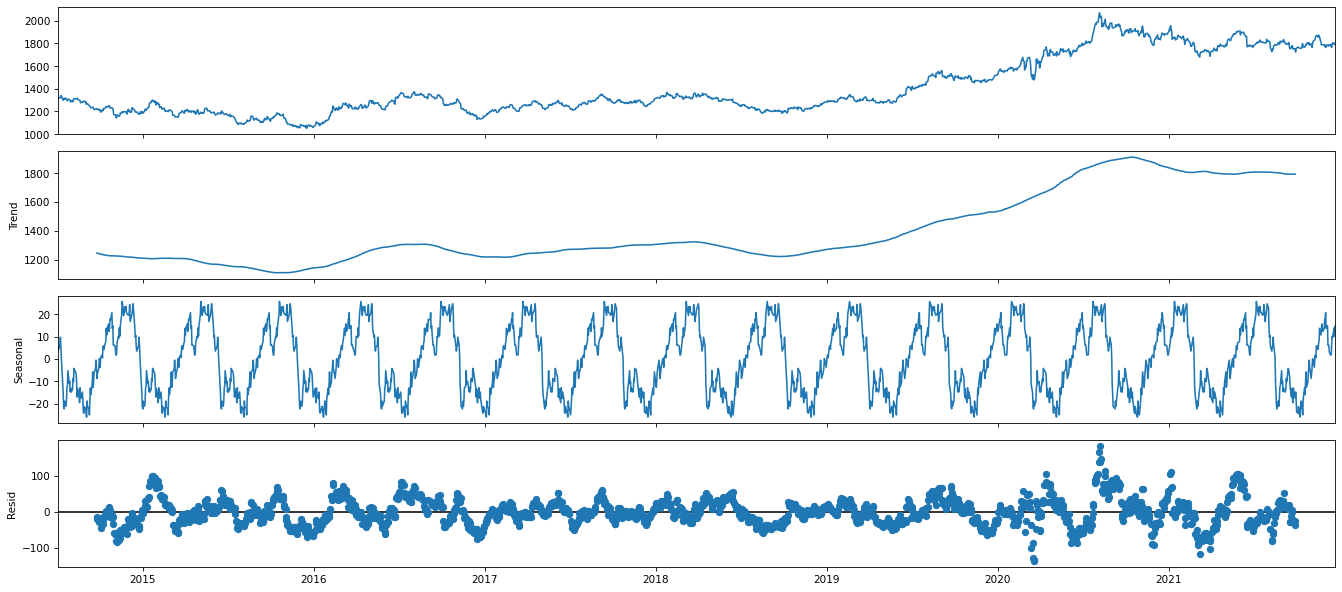

In [127]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})
result = seasonal_decompose(y_hist, model='additive', period=120)
result.plot()
plt.show()

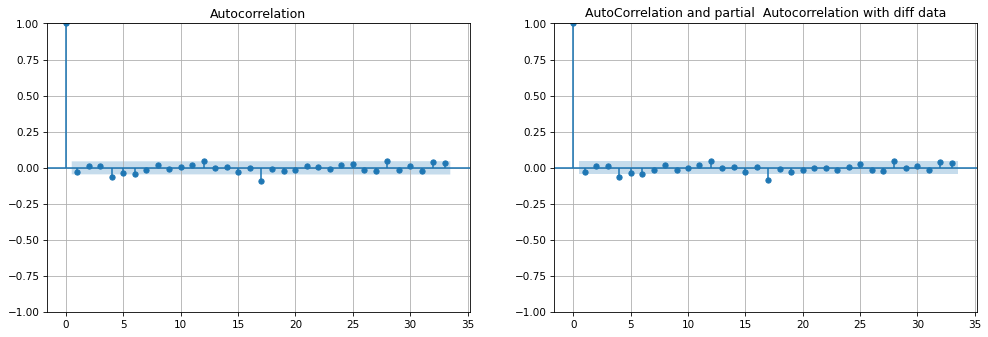

In [128]:
# Diff  automcorrelation
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(data_diff, ax = ax[0]);
ax[0].grid()
plot_pacf(data_diff, ax = ax[1], method = 'ywm');
ax[1].grid()
plt.title("AutoCorrelation and partial  Autocorrelation with diff data")
plt.show()

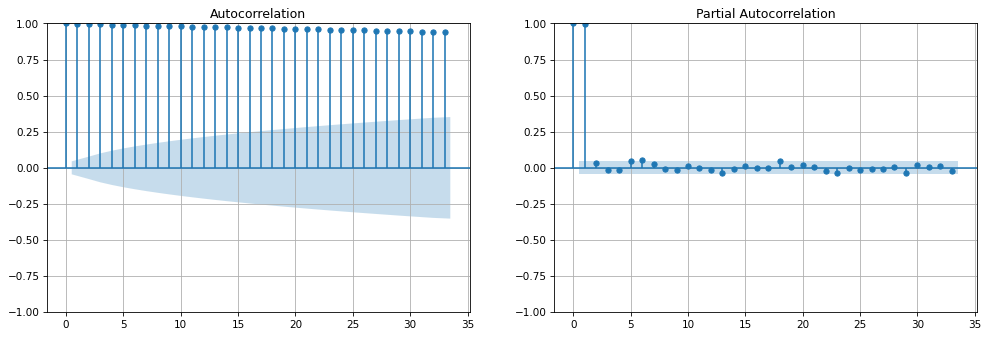

In [129]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(y_hist, ax = ax[0]);
ax[0].grid()
plot_pacf(y_hist, ax = ax[1], method = 'ywm');
ax[1].grid()

In [133]:
# Now start with an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
arma = ARIMA(y_hist['Close/Last'], order = (5, 1, 0)).fit()

Date
2014-07-03       0.000000
2014-07-04    1320.591813
2014-07-07    1320.602675
2014-07-08    1317.116193
2014-07-09    1316.461102
Name: predicted_mean, dtype: float64


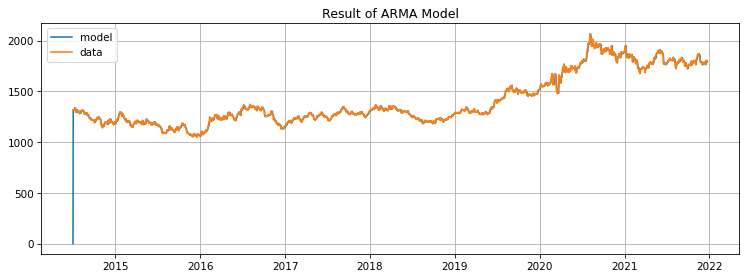

In [135]:
hist_preds = arma.predict()
print(hist_preds.head())
plt.figure(figsize = (12, 4))
plt.plot(y_hist.index, hist_preds, label = 'model')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model');

In [137]:
future_preds = arma.forecast(steps = len(y_future))
future_preds

1897    1799.874731
1898    1800.442833
1899    1801.302078
1900    1800.629339
1901    1800.302657
           ...     
2525    1800.340872
2526    1800.340872
2527    1800.340872
2528    1800.340872
2529    1800.340872
Name: predicted_mean, Length: 633, dtype: float64

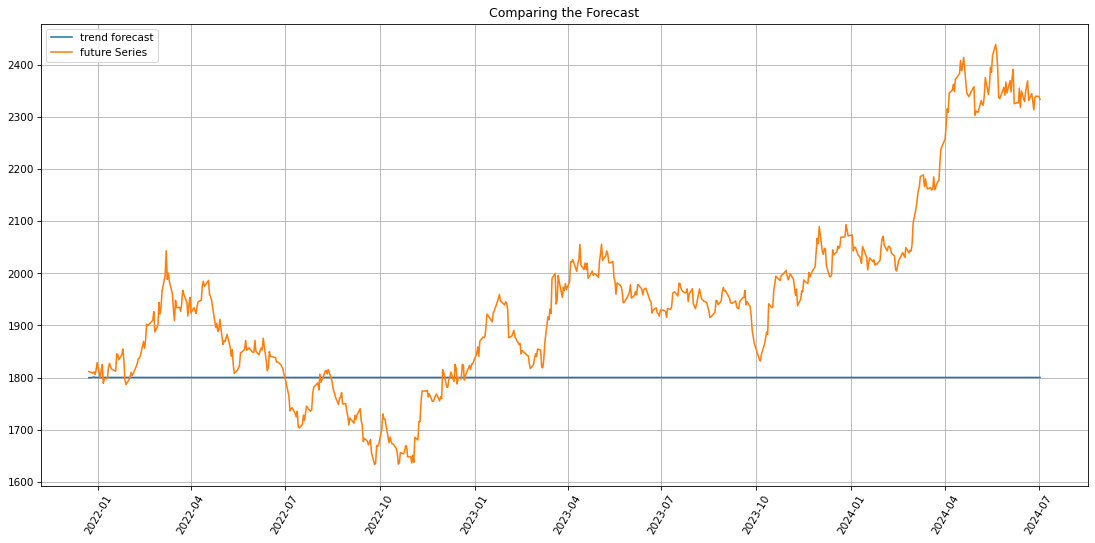

In [139]:
plt.plot(y_future.index, future_preds, label = 'trend forecast')
plt.plot(y_future.index, y_future, label = 'future Series')
plt.title('Comparing the Forecast')
plt.legend();
plt.xticks(rotation = 60)
plt.grid();

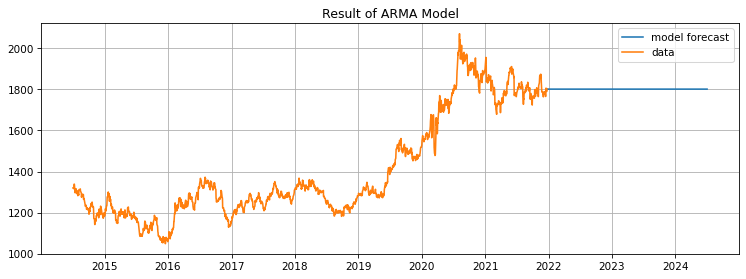

In [141]:
plt.figure(figsize = (12, 4))
plt.plot(y_future.index,future_preds, label = 'model forecast')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model');

In [143]:
from statsmodels.tsa.arima.model import ARIMA
#armaHist = ARIMA(y_hist['Close/Last'], order = (5, 1, 0)).fit()
armaHist = ARIMA(y_hist['Close/Last'].diff().dropna(), order = (5, 1, 0)).fit()
predsHist = armaHist.forecast(len(y_future))
#mse_test = mean_squared_error(predsHist, X_test)

<Axes: xlabel='Date'>

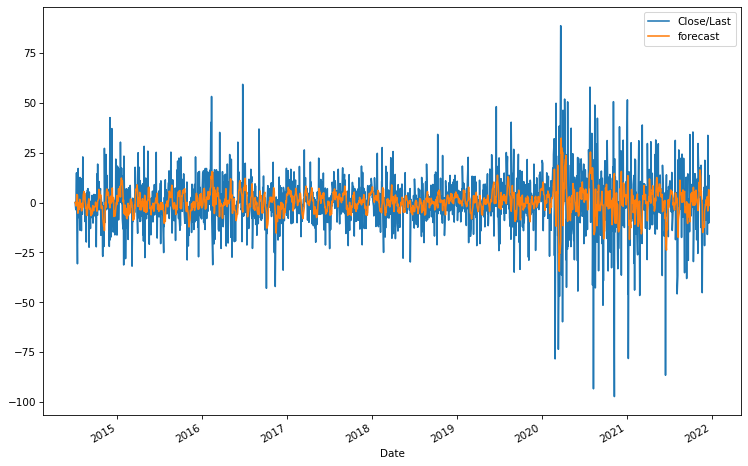

In [145]:
df2= y_hist.diff()
model=ARIMA(df2['Close/Last'].dropna(),order=(5,1,0))
model_fit=model.fit()
df2['forecast']=model_fit.predict()
df2[['Close/Last','forecast']].plot(figsize=(12,8))

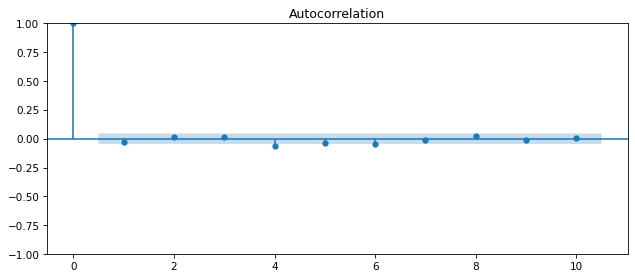

In [147]:
fig, ax = plt.subplots(figsize=(10,4))
tsaplots.plot_acf(data_diff,lags=10, ax=ax)
plt.show()

In [149]:
from sklearn.metrics import mean_squared_error
arma = ARIMA(y_hist.diff(), order = (1, 0, 1)).fit()
preds = arma.forecast(len(y_future))
mse_test = mean_squared_error(preds, y_future)

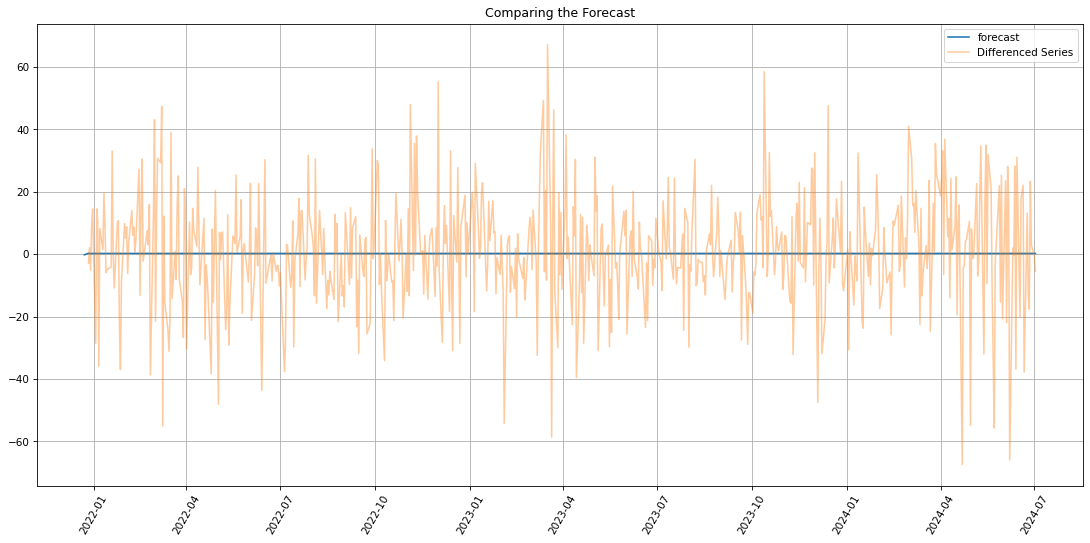

In [151]:
plt.plot(y_future.index, preds, label = 'forecast')
plt.plot(y_future.index, y_future.diff(), label = 'Differenced Series', alpha=0.4)
plt.title('Comparing the Forecast')
plt.legend();
plt.xticks(rotation = 60)
plt.grid();

In [153]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(y_hist,  order=(1, 0, 1), seasonal_order=(1, 1, 0, 12)).fit(disp=0)

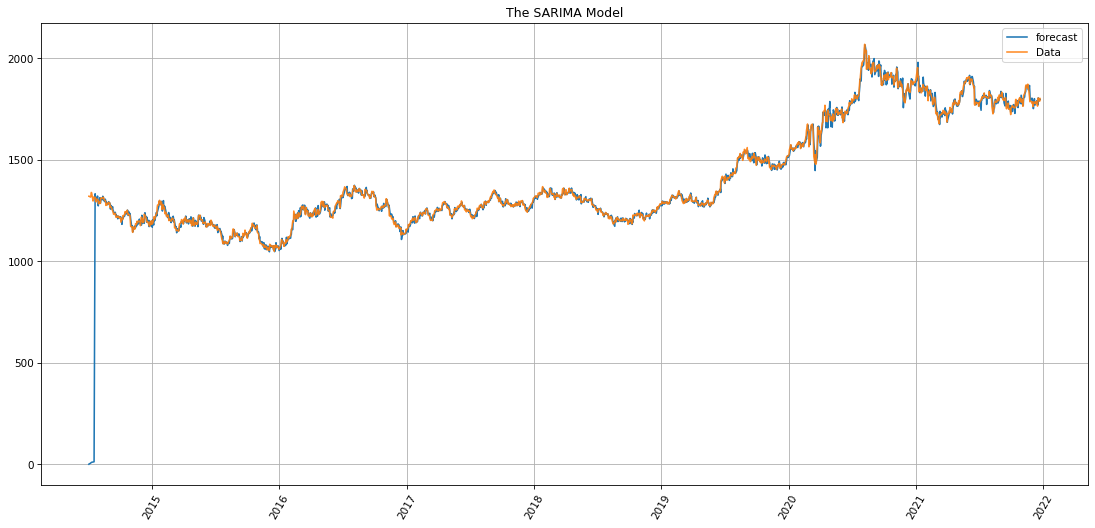

In [154]:
plt.plot(y_hist.index, sarima.predict(),label = 'forecast')
plt.plot(y_hist.index, y_hist, alpha = 0.9,label = 'Data')
plt.xticks(rotation = 60)
plt.title('The SARIMA Model')
plt.legend();
plt.grid();

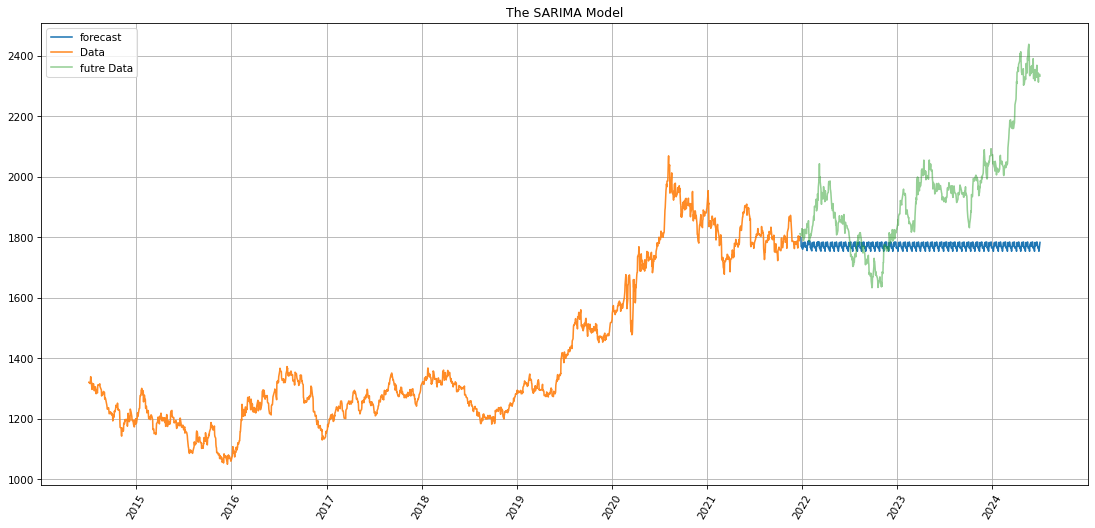

In [157]:
plt.plot(y_future.index, sarima.forecast(steps =len(y_future)),label = 'forecast')
plt.plot(y_hist.index, y_hist, alpha = 0.9,label = 'Data')
plt.plot(y_future.index, y_future, alpha = 0.5,label = 'futre Data')
plt.xticks(rotation = 60)
plt.title('The SARIMA Model')
plt.legend();
plt.grid();

In [159]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Close/Last   No. Observations:                 1897
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood               -7972.860
Date:                             Sat, 03 Aug 2024   AIC                          15953.720
Time:                                     23:27:18   BIC                          15975.886
Sample:                                          0   HQIC                         15961.883
                                            - 1897                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9371      0.006    153.334      0.000       0.925       0.949
ma.L1         -0.0122      0.017     -0.733      0.464      -0.045       0.020
ar.S.L12      -0.4750      0.014    -34.319      0.000      -0.502      -0.448
sigma2       275.5640      5.613     49.095      0.000     264.563     286.565
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               944.18
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.88   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

<Axes: xlabel='Date'>

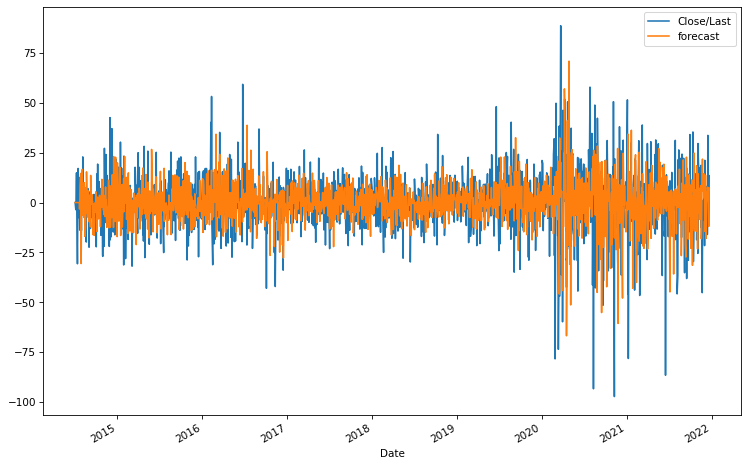

In [163]:
df3= y_hist.diff()
sarima2 = SARIMAX(df3.dropna(),  order=(1, 0, 1), seasonal_order=(1, 1, 0, 12)).fit(disp=0)

df3['forecast']=sarima2.predict()
df3[['Close/Last','forecast']].plot(figsize=(12,8))

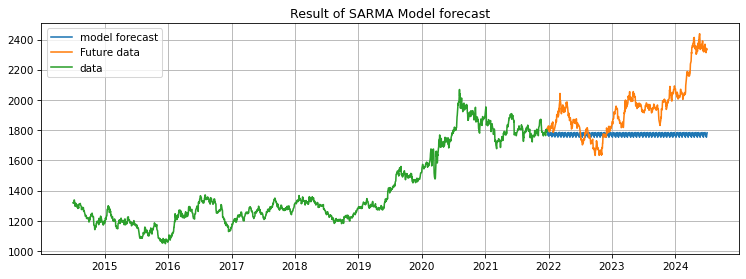

In [165]:
future_preds2 = sarima.forecast(steps = len(y_future))

plt.figure(figsize = (12, 4))
plt.plot(y_future.index,future_preds2, label = 'model forecast')
plt.plot(y_future, label = 'Future data')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.grid()
plt.title('Result of SARMA Model forecast');

In [167]:
index_9_months = pd.date_range(y_future.index[-1], freq='MS', periods=9)
index_9_months
sarima = SARIMAX(y_future,  order=(1, 0, 1), seasonal_order=(1, 1, 0, 9)).fit(disp=0)

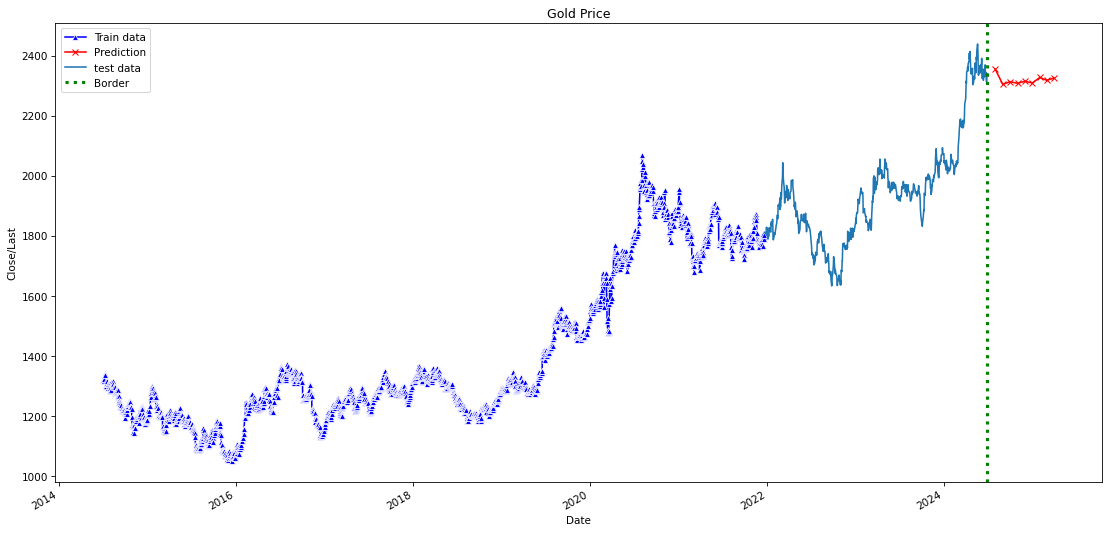

In [169]:
gold_forecast = sarima.forecast(9)
gold_forecast.index =pd.to_datetime(index_9_months)
gold_forecast = pd.DataFrame(gold_forecast.rename("Prediction"))

fig, ax = plt.subplots(figsize = (18, 9))
sns.lineplot(x = 'Date', y='Close/Last', data=y_hist, color = 'blue', marker = '^', label = 'Train data')
gold_forecast.plot(ax = ax, c = 'red', marker = 'x', label = 'Prediction')
plt.plot(y_future, label = 'test data')
plt.title('Gold Price')
ax.axvline(x = 19900, ls = ':', linewidth = 3, c = 'green', label = 'Border')
plt.legend()
plt.show()

In [174]:
data=gold
close_prices = data['Close/Last']
close_prices

0       2333.4
1       2338.9
2       2339.6
3       2336.6
4       2313.2
         ...  
2525    1324.3
2526    1316.5
2527    1317.0
2528    1320.6
2529    1320.6
Name: Close/Last, Length: 2530, dtype: float64

In [176]:
import numpy as np

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10  # Number of time steps to look back 
X, y = create_sequences(close_prices.values, seq_length)

In [178]:
X


array([[2333.4, 2338.9, 2339.6, ..., 2331.2, 2369. , 2346.9],
       [2338.9, 2339.6, 2336.6, ..., 2369. , 2346.9, 2329. ],
       [2339.6, 2336.6, 2313.2, ..., 2346.9, 2329. , 2349.1],
       ...,
       [1308. , 1315.5, 1309.4, ..., 1337.4, 1339.2, 1324.3],
       [1315.5, 1309.4, 1316.9, ..., 1339.2, 1324.3, 1316.5],
       [1309.4, 1316.9, 1299.8, ..., 1324.3, 1316.5, 1317. ]])

In [180]:
y

array([2329. , 2349.1, 2318. , ..., 1316.5, 1317. , 1320.6])

In [182]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Model architecture
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [184]:
# Train the model
# Reshape data for (Sample, Time Steps, Features) 
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train the model
history = model.fit(X, y, epochs=30, validation_split=0.2, verbose=1)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 31892.5430 - val_loss: 867.5989
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1315.2402 - val_loss: 850.6625
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1420.8739 - val_loss: 781.0430
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1334.7974 - val_loss: 793.7654
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1299.2690 - val_loss: 648.2934
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1102.1693 - val_loss: 648.8503
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1165.9015 - val_loss: 677.0446
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1085.8235 - val_loss: 612.0292
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1091.6388 - val_loss: 634.7581
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1080.6927 - val_loss: 621.2773
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1077.5907 - val_loss: 629.2730
Epoch 1

In [186]:
###Evaluation and Comparison Finally, you’ll evaluate the LSTM model and compare it with a baseline model, such as a simple moving average or ARIMA.

###LSTM Performance: Look at the MSE on test data and plots of predictions against actual values. Baseline Model: Fit an ARIMA model to the same data and compare the performance.

In [188]:
from sklearn.model_selection import train_test_split

# Assuming you have already defined and created 'X' and 'y' from your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test if needed (specifically for LSTM input)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [190]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model on the training data
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1247201.8750 - val_loss: 4102.0967
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4501.0918 - val_loss: 1125.7399
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1071.6592 - val_loss: 1228.4198
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1203.2578 - val_loss: 1087.0836
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1200.2378 - val_loss: 1078.7783
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1126.3643 - val_loss: 1095.5388
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1172.0354 - val_loss: 1078.0465
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1048.1539 - val_loss: 1033.8766
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1094.7134 - val_loss: 1112.9806
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1170.2786 - val_loss: 959.4558


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


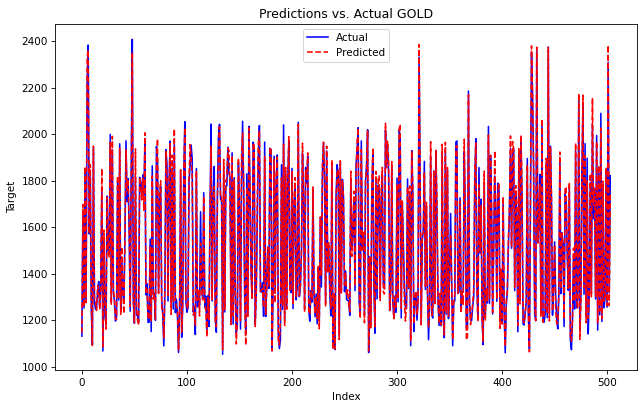

In [192]:
#6. Visualizing Prediction To visualize the performance of your LSTM model, you can plot its predictions against the actual values from the test dataset. This will give you a clear visual representation of how well the model is capturing the trends and fluctuations in the data.
import matplotlib.pyplot as plt
test_predictions = model.predict(X_test)
test_predictions = test_predictions.flatten()  # Flatten the array if needed

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(test_predictions, label='Predicted', color='red', linestyle='--')
plt.title('Predictions vs. Actual GOLD')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()

In [194]:
# GRU Model
from keras.layers import LSTM, GRU, Dense
model_gru = Sequential([
    GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 2498045.2500 - val_loss: 2344376.7500
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2506698.2500 - val_loss: 2340123.0000
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2505049.5000 - val_loss: 2335867.2500
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2463398.0000 - val_loss: 2331616.0000
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2471042.5000 - val_loss: 2327366.2500
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2491999.5000 - val_loss: 2323126.0000
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2448778.0000 - val_loss: 2318904.7500
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2475063.0000 - val_loss: 2314667.7500
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2498969.0000 - val_loss: 2310442.7500
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2427504.5000 - val_loss: 2306228.0000


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


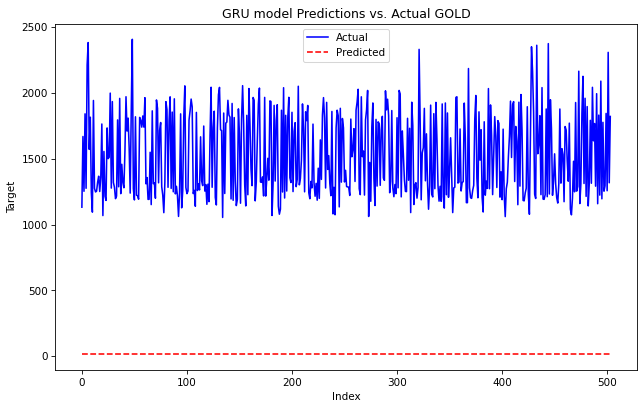

In [195]:
test_predictions = model_gru.predict(X_test)
test_predictions = test_predictions.flatten()  # Flatten the array if needed

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(test_predictions, label='Predicted', color='red', linestyle='--')
plt.title('GRU model Predictions vs. Actual GOLD')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()

In [198]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train,  epochs=100)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2486529.5000 - mean_absolute_error: 1541.1779
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2428727.5000 - mean_absolute_error: 1522.6730
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2288686.2500 - mean_absolute_error: 1477.3301
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2037457.2500 - mean_absolute_error: 1387.2509
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1557128.5000 - mean_absolute_error: 1200.4186
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 951878.6250 - mean_absolute_error: 914.6991
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 426274.8125 - mean_absolute_error: 551.4945
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 162703.1719 - mean_absolute_error: 306.6512
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 113282.5781 - mean_absolute_error: 295.1880
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss:

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


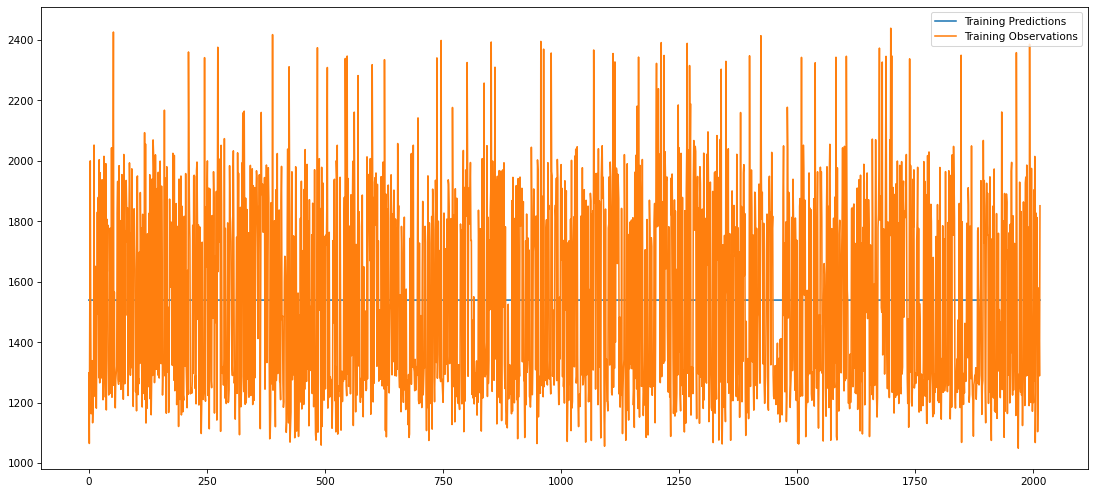

In [199]:
train_predictions = model.predict(X_train).flatten()

plt.plot(train_predictions)
plt.plot( y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [202]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model_gr = Sequential([layers.Input((3, 1)),
                    layers.GRU(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model_gr.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model_gr.fit(X_train, y_train,  epochs=100)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2472868.5000 - mean_absolute_error: 1537.1941
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2406756.0000 - mean_absolute_error: 1516.6893
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2304484.2500 - mean_absolute_error: 1482.0507
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1999312.0000 - mean_absolute_error: 1374.9507
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1567390.8750 - mean_absolute_error: 1204.9479
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1005329.7500 - mean_absolute_error: 943.1057
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 481096.7500 - mean_absolute_error: 606.6212
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 210000.1406 - mean_absolute_error: 341.9780
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 119871.0391 - mean_absolute_error: 295.3409
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step 

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


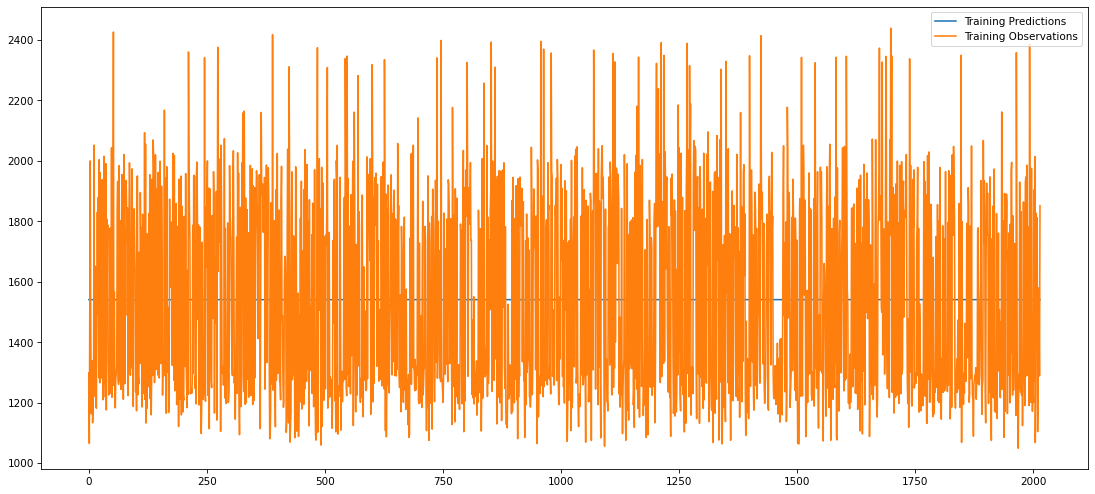

In [204]:
train_predictions = model_gr.predict(X_train).flatten()

plt.plot(train_predictions)
plt.plot( y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [336]:
gold_eda = gold.copy()
gold_eda = gold_eda.set_index(pd.to_datetime(gold_eda['Date'])).drop('Date', axis = 1)

gold_eda = gold_eda.sort_values(by='Date', ascending=True)
gold_eda

,Close/Last,Volume,Open,High,Low
Date,,,,,
2014-07-03,1320.6,980.0,1321.1,1321.5,1319.8
2014-07-04,1320.6,NaN,1320.6,1320.6,1320.6
2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1
2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3
2014-07-09,1324.3,155101.0,1320.4,1333.4,1318.7
...,...,...,...,...,...
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7


In [338]:
US_Uncertainity = pd.read_csv(r'data\USEPUINDXD.csv') 

US_Uncertainity = US_Uncertainity.set_index(pd.to_datetime(US_Uncertainity['DATE'])).drop('DATE', axis = 1)
US_Uncertainity

,USEPUINDXD
DATE,
2014-07-01,94.53
2014-07-02,85.01
2014-07-03,41.51
2014-07-04,52.44
2014-07-05,79.35
...,...
2024-06-27,90.29
2024-06-28,53.23
2024-06-29,137.27


In [340]:
#merged_df2 = pd.concat([gold_eda, US_Uncertainity], axis=1)
gold_edaTest = pd.concat([gold_eda,US_Uncertainity],  axis=1)
gold_edaTest

,Close/Last,Volume,Open,High,Low,USEPUINDXD
2014-07-01,NaN,NaN,NaN,NaN,NaN,94.53
2014-07-02,NaN,NaN,NaN,NaN,NaN,85.01
2014-07-03,1320.6,980.0,1321.1,1321.5,1319.8,41.51
2014-07-04,1320.6,NaN,1320.6,1320.6,1320.6,52.44
2014-07-05,NaN,NaN,NaN,NaN,NaN,79.35
...,...,...,...,...,...,...
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7,53.23
2024-06-29,NaN,NaN,NaN,NaN,NaN,137.27
2024-06-30,NaN,NaN,NaN,NaN,NaN,134.77
2024-07-01,2338.9,136861.0,2336.2,2348.8,2328.2,3.67


In [342]:
gold_edaTest=gold_edaTest.dropna()
gold_edaTest

,Close/Last,Volume,Open,High,Low,USEPUINDXD
2014-07-03,1320.6,980.0,1321.1,1321.5,1319.8,41.51
2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1,61.40
2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3,28.93
2014-07-09,1324.3,155101.0,1320.4,1333.4,1318.7,49.91
2014-07-10,1339.2,167391.0,1325.0,1346.8,1325.0,48.39
...,...,...,...,...,...,...
2024-06-25,2330.8,140179.0,2346.8,2349.7,2327.1,49.81
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7,67.02
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8,90.29
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7,53.23


In [344]:
US_Volatility = pd.read_csv(r'data\VIXCLS.csv') 
US_Volatility = US_Volatility.set_index(pd.to_datetime(US_Volatility['DATE'])).drop('DATE', axis = 1)
US_Volatility

,VIXCLS
DATE,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
...,...
2024-06-25,12.84
2024-06-26,12.55
2024-06-27,12.24


In [346]:
gold_edaTest2 = pd.concat([gold_edaTest,US_Volatility],  axis=1)
gold_edaTest2

,Close/Last,Volume,Open,High,Low,USEPUINDXD,VIXCLS
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,17.24
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,18.19
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,19.22
1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,20.11
1990-01-08,NaN,NaN,NaN,NaN,NaN,NaN,20.26
...,...,...,...,...,...,...,...
2024-06-25,2330.8,140179.0,2346.8,2349.7,2327.1,49.81,12.84
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7,67.02,12.55
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8,90.29,12.24
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7,53.23,12.44


In [348]:
gold_edaTest2=gold_edaTest2.dropna()
gold_edaTest2

,Close/Last,Volume,Open,High,Low,USEPUINDXD,VIXCLS
2014-07-03,1320.6,980.0,1321.1,1321.5,1319.8,41.51,10.32
2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1,61.40,11.33
2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3,28.93,11.98
2014-07-09,1324.3,155101.0,1320.4,1333.4,1318.7,49.91,11.65
2014-07-10,1339.2,167391.0,1325.0,1346.8,1325.0,48.39,12.59
...,...,...,...,...,...,...,...
2024-06-25,2330.8,140179.0,2346.8,2349.7,2327.1,49.81,12.84
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7,67.02,12.55
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8,90.29,12.24
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7,53.23,12.44


In [350]:
#add oil volatility 
US_OilVolatility = pd.read_csv(r'data\OVXCLS.csv') 
US_OilVolatility = US_OilVolatility.set_index(pd.to_datetime(US_OilVolatility['DATE'])).drop('DATE', axis = 1)
US_OilVolatility

,OVXCLS
DATE,
2007-05-10,27.09
2007-05-11,26.41
2007-05-14,27.23
2007-05-15,27.89
2007-05-16,27.07
...,...
2024-06-25,25.75
2024-06-26,26.24
2024-06-27,26.28


In [352]:
gold_edaTest3 = pd.concat([gold_edaTest2,US_OilVolatility],  axis=1)
gold_edaTest3

,Close/Last,Volume,Open,High,Low,USEPUINDXD,VIXCLS,OVXCLS
2007-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.09
2007-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.41
2007-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.23
2007-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.89
2007-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.07
...,...,...,...,...,...,...,...,...
2024-06-25,2330.8,140179.0,2346.8,2349.7,2327.1,49.81,12.84,25.75
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7,67.02,12.55,26.24
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8,90.29,12.24,26.28
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7,53.23,12.44,26.54


In [354]:
gold_edaTest3=gold_edaTest3.dropna()
gold_edaTest3

,Close/Last,Volume,Open,High,Low,USEPUINDXD,VIXCLS,OVXCLS
2014-07-03,1320.6,980.0,1321.1,1321.5,1319.8,41.51,10.32,15.59
2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1,61.40,11.33,16.36
2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3,28.93,11.98,16.31
2014-07-09,1324.3,155101.0,1320.4,1333.4,1318.7,49.91,11.65,16.36
2014-07-10,1339.2,167391.0,1325.0,1346.8,1325.0,48.39,12.59,16.46
...,...,...,...,...,...,...,...,...
2024-06-25,2330.8,140179.0,2346.8,2349.7,2327.1,49.81,12.84,25.75
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7,67.02,12.55,26.24
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8,90.29,12.24,26.28
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7,53.23,12.44,26.54


In [356]:
# Add gold etf volatility index GVZCLS
US_GoldVolatility = pd.read_csv(r'data\GVZCLS.csv') 
US_GoldVolatility = US_GoldVolatility.set_index(pd.to_datetime(US_GoldVolatility['DATE'])).drop('DATE', axis = 1)
US_GoldVolatility

,GVZCLS
DATE,
2008-06-03,22.89
2008-06-04,22.69
2008-06-05,22.78
2008-06-06,23.60
2008-06-09,24.47
...,...
2024-06-25,14.88
2024-06-26,14.88
2024-06-27,15.01


In [358]:
gold_edaTest4 = pd.concat([gold_edaTest3,US_GoldVolatility],  axis=1)
gold_edaTest4

,Close/Last,Volume,Open,High,Low,USEPUINDXD,VIXCLS,OVXCLS,GVZCLS
2008-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.89
2008-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.69
2008-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.78
2008-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.60
2008-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.47
...,...,...,...,...,...,...,...,...,...
2024-06-25,2330.8,140179.0,2346.8,2349.7,2327.1,49.81,12.84,25.75,14.88
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7,67.02,12.55,26.24,14.88
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8,90.29,12.24,26.28,15.01
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7,53.23,12.44,26.54,14.72


In [360]:
gold_edaTest4=gold_edaTest4.dropna()
gold_edaTest4

,Close/Last,Volume,Open,High,Low,USEPUINDXD,VIXCLS,OVXCLS,GVZCLS
2014-07-03,1320.6,980.0,1321.1,1321.5,1319.8,41.51,10.32,15.59,12.99
2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1,61.40,11.33,16.36,12.99
2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3,28.93,11.98,16.31,12.83
2014-07-09,1324.3,155101.0,1320.4,1333.4,1318.7,49.91,11.65,16.36,13.05
2014-07-10,1339.2,167391.0,1325.0,1346.8,1325.0,48.39,12.59,16.46,12.91
...,...,...,...,...,...,...,...,...,...
2024-06-25,2330.8,140179.0,2346.8,2349.7,2327.1,49.81,12.84,25.75,14.88
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7,67.02,12.55,26.24,14.88
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8,90.29,12.24,26.28,15.01
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7,53.23,12.44,26.54,14.72


In [366]:
# Add Equity Market-related Economic Uncertainty Index
US_EqtyUncert = pd.read_csv(r'data\WLEMUINDXD.csv') 
US_EqtyUncert = US_EqtyUncert.set_index(pd.to_datetime(US_EqtyUncert['DATE'])).drop('DATE', axis = 1)
US_EqtyUncert

,WLEMUINDXD
DATE,
2014-07-01,10.28
2014-07-02,8.43
2014-07-03,34.65
2014-07-04,11.47
2014-07-05,14.88
...,...
2024-06-27,9.88
2024-06-28,23.29
2024-06-29,858.03


In [368]:
gold_edaTest5 = pd.concat([gold_edaTest4,US_EqtyUncert],  axis=1)
gold_edaTest5

,Close/Last,Volume,Open,High,Low,USEPUINDXD,VIXCLS,OVXCLS,GVZCLS,WLEMUINDXD
2014-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.28
2014-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.43
2014-07-03,1320.6,980.0,1321.1,1321.5,1319.8,41.51,10.32,15.59,12.99,34.65
2014-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.47
2014-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.88
...,...,...,...,...,...,...,...,...,...,...
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8,90.29,12.24,26.28,15.01,9.88
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7,53.23,12.44,26.54,14.72,23.29
2024-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.03
2024-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.87


In [370]:
gold_edaTest5=gold_edaTest5.dropna()
gold_edaTest5

,Close/Last,Volume,Open,High,Low,USEPUINDXD,VIXCLS,OVXCLS,GVZCLS,WLEMUINDXD
2014-07-03,1320.6,980.0,1321.1,1321.5,1319.8,41.51,10.32,15.59,12.99,34.65
2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1,61.40,11.33,16.36,12.99,13.43
2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3,28.93,11.98,16.31,12.83,9.58
2014-07-09,1324.3,155101.0,1320.4,1333.4,1318.7,49.91,11.65,16.36,13.05,7.79
2014-07-10,1339.2,167391.0,1325.0,1346.8,1325.0,48.39,12.59,16.46,12.91,6.68
...,...,...,...,...,...,...,...,...,...,...
2024-06-25,2330.8,140179.0,2346.8,2349.7,2327.1,49.81,12.84,25.75,14.88,23.78
2024-06-26,2313.2,182929.0,2331.8,2335.8,2304.7,67.02,12.55,26.24,14.88,48.88
2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8,90.29,12.24,26.28,15.01,9.88
2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7,53.23,12.44,26.54,14.72,23.29


In [461]:
### Now find corelationssss
correlation_matrix = gold_edaTest5[['Close/Last','Volume','USEPUINDXD','VIXCLS','OVXCLS','GVZCLS','WLEMUINDXD' ]].corr()
print(correlation_matrix)


            Close/Last    Volume  USEPUINDXD    VIXCLS    OVXCLS    GVZCLS  \
Close/Last    1.000000  0.020567    0.357309  0.286747  0.286747  0.286747   
Volume        0.020567  1.000000    0.007106  0.000431  0.000431  0.000431   
USEPUINDXD    0.357309  0.007106    1.000000  0.574467  0.574467  0.574467   
VIXCLS        0.286747  0.000431    0.574467  1.000000  1.000000  1.000000   
OVXCLS        0.286747  0.000431    0.574467  1.000000  1.000000  1.000000   
GVZCLS        0.286747  0.000431    0.574467  1.000000  1.000000  1.000000   
WLEMUINDXD    0.315754  0.003452    0.586398  0.539624  0.539624  0.539624   

            WLEMUINDXD  
Close/Last    0.315754  
Volume        0.003452  
USEPUINDXD    0.586398  
VIXCLS        0.539624  
OVXCLS        0.539624  
GVZCLS        0.539624  
WLEMUINDXD    1.000000  


In [425]:
gold_edaTest5['OVXCLS']  = gold_edaTest5.VIXCLS.astype(float)
gold_edaTest5['GVZCLS']  = gold_edaTest5.VIXCLS.astype(float)
gold_edaTest5['WLEMUINDXD'] = gold_edaTest5.WLEMUINDXD.astype(float)
gold_edaTest5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2510 entries, 2014-07-03 to 2024-07-01
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2510 non-null   float64
 1   Volume      2510 non-null   float64
 2   Open        2510 non-null   float64
 3   High        2510 non-null   float64
 4   Low         2510 non-null   float64
 5   USEPUINDXD  2510 non-null   float64
 6   VIXCLS      2510 non-null   float64
 7   OVXCLS      2510 non-null   float64
 8   GVZCLS      2510 non-null   float64
 9   WLEMUINDXD  2510 non-null   float64
dtypes: float64(10)
memory usage: 215.7 KB


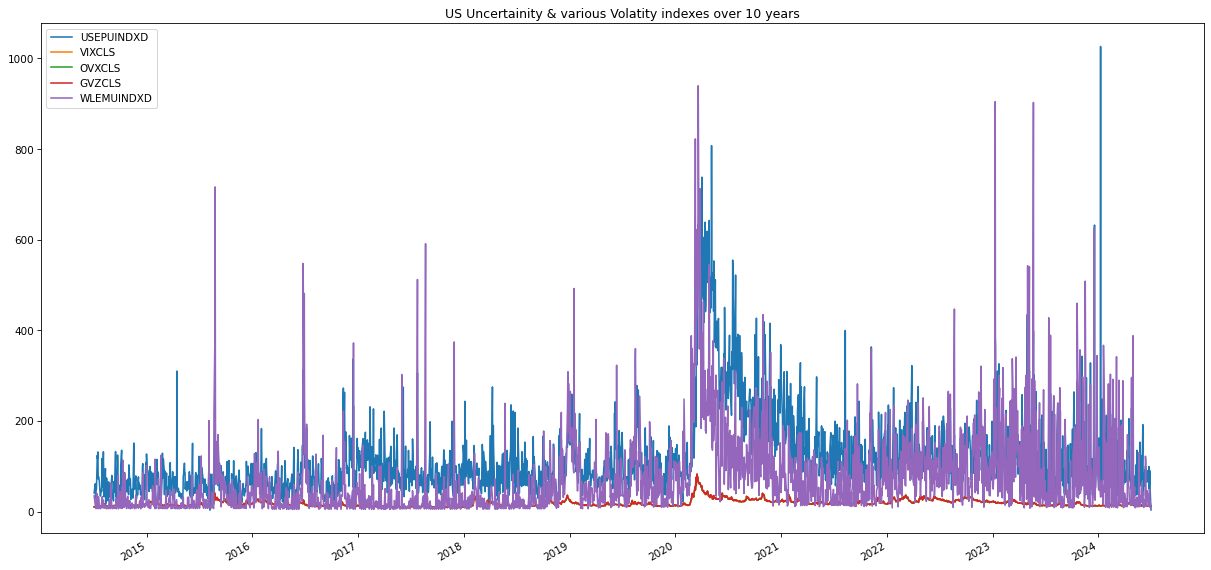

In [445]:

fig, ax = plt.subplots(figsize=(20, 10))
gold_edaTest5[['USEPUINDXD','VIXCLS','OVXCLS','GVZCLS','WLEMUINDXD' ]].plot(ax=ax, x_compat=True)  # Use x_compat=True for compatibility with date locators
plt.title('US Uncertainity & various Volatity indexes over 10 years')

plt.show()

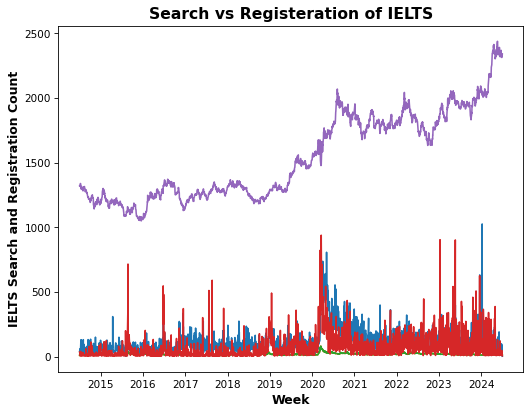

In [467]:
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = gold_edaTest5, x = gold_edaTest5.index, y ='USEPUINDXD')
sns.lineplot(data = gold_edaTest5, x = gold_edaTest5.index, y ='VIXCLS')
sns.lineplot(data = gold_edaTest5, x = gold_edaTest5.index, y ='OVXCLS')
sns.lineplot(data = gold_edaTest5, x = gold_edaTest5.index, y ='WLEMUINDXD')
sns.lineplot(data = gold_edaTest5, x = gold_edaTest5.index, y ='Close/Last')
plt.title('Search vs Registeration of IELTS', weight='bold', fontsize = 15)
plt.ylabel('IELTS Search and Registration Count', weight='bold', fontsize = 12)
plt.xlabel('Week', weight='bold', fontsize = 12)
plt.show()

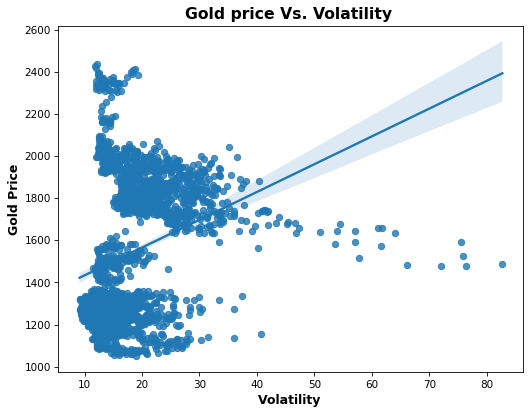

In [469]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(data = gold_edaTest5, x ='VIXCLS' , y ='Close/Last')
plt.title('Gold price Vs. Volatility ', weight='bold', fontsize = 15)
plt.ylabel('Gold Price count', weight='bold', fontsize = 12)
plt.xlabel('Volatility count', weight='bold', fontsize = 12)
plt.show()

In [473]:
#a native SciPy function from linregress which calculates:

#slope : slope of the regression line

#intercept : intercept of the regression line

#r-value : correlation coefficient

#p-value : two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero

#stderr : Standard error of the estimate
from scipy.stats import linregress
linregress(gold_edaTest5['Close/Last'], gold_edaTest5['VIXCLS'])


LinregressResult(slope=0.006234120038481676, intercept=8.498049333725138, rvalue=0.2867468018362132, pvalue=1.0346724355677585e-48, stderr=0.000415892629779284, intercept_stderr=0.6554462257185094)

In [475]:
linregress(gold_edaTest5['Close/Last'], gold_edaTest5['USEPUINDXD'])


LinregressResult(slope=0.09842378542554933, intercept=-32.802237393265756, rvalue=0.3573086105756679, pvalue=1.8285067918380464e-76, stderr=0.005137281440964496, intercept_stderr=8.096348648257889)

In [477]:
linregress(gold_edaTest5['Close/Last'], gold_edaTest5['WLEMUINDXD'])

LinregressResult(slope=0.08694383012387122, intercept=-62.92625077439827, rvalue=0.31575413766100774, pvalue=3.180815037607533e-59, stderr=0.005216982909218052, intercept_stderr=8.221958055134708)

In [479]:
linregress(gold_edaTest5['Close/Last'], gold_edaTest5['OVXCLS'])
# This seems to get the highest correlation

LinregressResult(slope=0.006234120038481676, intercept=8.498049333725138, rvalue=0.2867468018362132, pvalue=1.0346724355677585e-48, stderr=0.000415892629779284, intercept_stderr=0.6554462257185094)

In [447]:
# Run regression
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
lr_features = LinearRegression(fit_intercept=False).fit(gold_edaTest5[['USEPUINDXD','VIXCLS','OVXCLS','GVZCLS','WLEMUINDXD' ]], gold_edaTest5['Volume'])
print(lr_features)

LinearRegression(fit_intercept=False)


In [451]:
pred3 = lr_features.predict(gold_edaTest5[['USEPUINDXD','VIXCLS','OVXCLS','GVZCLS','WLEMUINDXD' ]])

In [449]:
lr_features.coef_

array([  50.21059679, 3243.77031498, 3243.77031498, 3243.77031498,
       -232.51470691])

In [455]:
pred3

array([ 94454.73623048, 110216.01113571, 115806.20679362, ...,
       121347.51544653, 118314.95069868, 117608.14821921])

In [511]:
### Next step is to do Gold price based Tweets

import nltk
import time

import string
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords 
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer 

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score,f1_score, classification_report

sns.set_style("whitegrid")
sns.set_palette("rocket")

warnings.simplefilter(action='ignore')

In [ ]:
# Sentiment Analysis of tweets on Gold Price
# Reference https://github.com/TGajanan/Sentiment-Analysis-of-Commodity-News-Gold-NLP/blob/main/Sentiment%20Analysis%20of%20Commodity%20News%20(Gold)%20Project%20NLP.ipynb


In [457]:
newsdf = pd.read_csv("data/gold-dataset-sinha-khandait.csv")

In [497]:
newsdf

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [499]:
newsdf.drop(columns = [ 'URL', 'Price Direction Up','Price Direction Constant','Price Direction Down','Asset Comparision','Past Information','Future Information'], inplace = True)


In [501]:
newsdf

,Dates,News,Price Sentiment
0,28-01-2016,"april gold down 20 cents to settle at $1,116.1...",negative
1,13-09-2017,gold suffers third straight daily decline,negative
2,26-07-2016,Gold futures edge up after two-session decline,positive
3,28-02-2018,dent research : is gold's day in the sun comin...,none
4,06-09-2017,"Gold snaps three-day rally as Trump, lawmakers...",negative
...,...,...,...
10565,07-01-2013,gold seen falling from 3-week high this week,negative
10566,27-09-2018,dominic frisby : now looks like a good time to...,positive
10567,03-03-2017,Gold heading for worst week since November on ...,negative
10568,11-06-2008,august gold up $7.60 at $878.80 an ounce on nymex,positive


In [545]:
#train test split
X = newsdf['News']
y = newsdf['Price Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [547]:
#Pre-Processing

#tokenization, stop word removal, punctuation removal, lower casing, and stemming
def preprocess_text(text):
    tokenizer = TweetTokenizer(preserve_case = False)
    swords = stopwords.words('english')
    punc = list(string.punctuation)
    stemmer = PorterStemmer()
    
    proprocessed_text = []
    for entry in text:
        tokens = tokenizer.tokenize(entry)
        proprocessed_text.append([stemmer.stem(word) for word in tokens if word not in swords and word not in punc])
    return proprocessed_text

#Call preprocessing
pX_train = preprocess_text(X_train)
X_train = [' '.join(x) for x in pX_train]

pX_test = preprocess_text(X_test)
X_test = [' '.join(x) for x in pX_test]

In [549]:
#### Model Training

#Holdout cross validation will be implemented: Models will be trained on the training set and validated with the test set.

#RandomizedSearchCV evaluated models using accuracy score, and fine tuned each model's hyperparameters to maximize this metric.
#**Naïve Bayes** 
#A pipeline object is created to standardize the data using TF-IDF and instantiate a Naïve Bayes model. 
#RandomizedSearchCV is used to find the optimal alpha value (options: [1, 0.1, 0.01, 0.001, 0]), which is 0.1.

In [551]:
#naive bayes model with tfidf vectorizer 
nb = Pipeline([
    ('tfidf', TfidfVectorizer(binary=True)),
    ('bayes', MultinomialNB())
])

In [553]:
#nb params
nb_params = {'bayes__alpha' : [1, 0.1, 0.01, 0.001, 0]}

In [555]:
#grid search 
nb_grid = RandomizedSearchCV(estimator = nb,
                            param_distributions = nb_params)

start = time.time()
nb_grid.fit(X_train, y_train)
stop = time.time()

#stats
nb_time = stop - start
nb_params = nb_grid.best_params_
nb_acc = nb_grid.score(X_test, y_test)
nb_rec = recall_score(y_test, nb_grid.predict(X_test),average='micro')
nb_f1 = f1_score(y_test, nb_grid.predict(X_test),average='micro')

In [557]:
nb_acc

0.7211502080968596

In [566]:
#logreg + tfidf 
lgr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lgr', LogisticRegression())
])

lgr_params = {'lgr__penalty' : ['l1', 'l2', 'none'],
             'lgr__fit_intercept' : [True, False]}

#gridsearch 
lgr_grid = RandomizedSearchCV(estimator = lgr,
                   param_distributions = lgr_params)


start = time.time()
lgr_grid.fit(X_train, y_train)
stop = time.time()

#stats
lgr_time = stop - start
lgr_params = lgr_grid.best_params_
lgr_acc = lgr_grid.score(X_test, y_test)
lgr_rec = recall_score(y_test, lgr_grid.predict(X_test),average='micro')
lgr_f1 = f1_score(y_test, lgr_grid.predict(X_test),average='micro')

In [568]:
lgr_acc

0.7930382141505865

In [575]:
lgr_params

{'lgr__penalty': 'l2', 'lgr__fit_intercept': True}

In [589]:
### NOW SVC


In [597]:

svc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC(kernel = 'linear'))
])
#params
svc_params = {'svc__C' : [0.1, 1],
             'svc__probability' : [True, False]}

#gridsearch
svc_grid = RandomizedSearchCV(estimator = svc,
                   param_distributions = svc_params)

start = time.time()
svc_grid.fit(X_train, y_train)
stop = time.time()

#stats
svc_time = stop - start
svc_params = svc_grid.best_params_
svc_acc = svc_grid.score(X_test, y_test)
svc_rec = recall_score(y_test, svc_grid.predict(X_test),average='micro')
svc_f1 = f1_score(y_test, svc_grid.predict(X_test),average='micro')



In [587]:
#print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

    negative       0.79      0.77      0.78       929
     neutral       0.73      0.64      0.68        97
        none       0.80      0.81      0.80       513
    positive       0.79      0.81      0.80      1104

    accuracy                           0.79      2643
   macro avg       0.78      0.76      0.77      2643
weighted avg       0.79      0.79      0.79      2643



In [599]:
results_df = pd.DataFrame({'model': ['Logistic Regression',  'Naive Bayes', 'SVC'], 
              'speed' : [lgr_time, nb_time, svc_time],
              'best_params': [lgr_params, nb_params, svc_params],
              'accuracy': [lgr_acc, nb_acc, svc_acc],
              'recall' : [lgr_rec, nb_rec, svc_rec],
              'f1' : [lgr_f1, nb_f1, svc_acc]}).set_index('model')

In [601]:
results_df

,speed,best_params,accuracy,recall,f1
model,,,,,
Logistic Regression,7.893842,"{'lgr__penalty': 'l2', 'lgr__fit_intercept': T...",0.793038,0.793038,0.793038
Naive Bayes,5.220377,{'bayes__alpha': 1},0.721150,0.721150,0.721150
SVC,483.537409,"{'svc__probability': True, 'svc__C': 1}",0.789633,0.789633,0.789633
